In [452]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

CDC by age

In [453]:
age_sex_data = pd.read_csv("Folder1/Death_Counts_by_Sex_Age_and_State.csv")
#age_sex_data.head()

In [454]:
age_state = age_sex_data.loc[(age_sex_data['Sex'] == 'All Sexes')]
age_state = age_state.loc[age_state['Group']=='By Year']
age_state = age_state.loc[age_state['State']!='Puerto Rico']
age_state = age_state.loc[age_state['State']!='United States']
age_state = age_state.loc[age_state['State']!='District of Columbia']
age_data = age_state.loc[age_state['Age Group']!='All Ages']

In [455]:
del age_data['Footnote']
del age_data['Data As Of']
del age_data['Sex']
del age_data['Pneumonia Deaths']
del age_data['Pneumonia and COVID-19 Deaths']
del age_data['Influenza Deaths']
del age_data['Pneumonia, Influenza, or COVID-19 Deaths']

In [456]:
age_data = age_data.fillna(0)
#age_data.head()

In [457]:
by_age_data = age_data.reset_index(drop=True)


In [458]:
by_age_data.loc[by_age_data['State']=='Alabama']

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
0,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,Under 1 year,0.0,402.0
1,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,0-17 years,0.0,692.0
2,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,1-4 years,0.0,88.0
3,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,5-14 years,0.0,103.0
4,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,15-24 years,0.0,736.0
5,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,18-29 years,24.0,1204.0
6,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,25-34 years,46.0,1360.0
7,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,30-39 years,78.0,1728.0
8,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,35-44 years,126.0,2159.0
9,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,40-49 years,219.0,2852.0


In [459]:
by_age_data['Age Group'].unique()

array(['Under 1 year', '0-17 years', '1-4 years', '5-14 years',
       '15-24 years', '18-29 years', '25-34 years', '30-39 years',
       '35-44 years', '40-49 years', '45-54 years', '50-64 years',
       '55-64 years', '65-74 years', '75-84 years', '85 years and over'],
      dtype=object)

In [460]:
by_age_data["Age Group"].value_counts()

1-4 years            102
5-14 years           102
85 years and over    102
Under 1 year         102
25-34 years          102
45-54 years          102
0-17 years           102
18-29 years          102
55-64 years          102
75-84 years          102
30-39 years          102
15-24 years          102
65-74 years          102
35-44 years          102
50-64 years          102
40-49 years          102
Name: Age Group, dtype: int64

In [461]:
by_age_data.to_csv("Folder2/age-data.csv", index=False, header=True)

CDC by sex


In [462]:
sex_data = pd.read_csv("Folder1/Death_Counts_by_Sex_Age_and_State.csv")
#sex_data.head()

In [463]:
all_ages = sex_data.loc[sex_data['Age Group'] == 'All Ages']
all_ages = all_ages.loc[all_ages['Group']=='By Month']
sex_state = all_ages.loc[all_ages['State']!='Puerto Rico']
sex_state = sex_state.loc[sex_state['State']!='United States']
sex_state = sex_state.loc[sex_state['State']!='District of Columbia']
sex_data = sex_state.loc[sex_state['Sex'] != 'All Sexes']

In [464]:
del sex_data['Footnote']
del sex_data['Data As Of']
del sex_data['Age Group']
del sex_data['Pneumonia Deaths']
del sex_data['Pneumonia and COVID-19 Deaths']
del sex_data['Influenza Deaths']
del sex_data['Pneumonia, Influenza, or COVID-19 Deaths']
sex_data = sex_data.fillna(0)

In [465]:
sex_data = sex_data.reset_index(drop=True)
sex_data.head()

,Start Date,End Date,Group,Year,Month,State,Sex,COVID-19 Deaths,Total Deaths
0,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,Male,0.0,2400.0
1,1/1/20,1/31/20,By Month,2020.0,1.0,Alabama,Female,0.0,2328.0
2,2/1/20,2/29/20,By Month,2020.0,2.0,Alabama,Male,0.0,2391.0
3,2/1/20,2/29/20,By Month,2020.0,2.0,Alabama,Female,0.0,2236.0
4,3/1/20,3/31/20,By Month,2020.0,3.0,Alabama,Male,31.0,2489.0


In [466]:
sex_data.to_csv("Folder2/sex-data.csv", index=False, header=True)

Race Data from CDC

In [467]:
race_ethnicity_data = pd.read_csv("Folder1/race-ethnicity.csv")

In [468]:
del race_ethnicity_data['Footnote']
del race_ethnicity_data['Data as of']

In [469]:
race_ethnicity_data = race_ethnicity_data.loc[(race_ethnicity_data['Group'] == 'By Month')]
race_ethnicity_data = race_ethnicity_data.loc[(race_ethnicity_data['State'] != 'United States')]
race_ethnicity_data = race_ethnicity_data.loc[race_ethnicity_data['State']!='District of Columbia']
race_ethnicity_data = race_ethnicity_data.fillna(0)
#race_ethnicity_data.head()

In [470]:
race_ethnicity_data.rename(columns={"Non-Hispanic White": "White", "Non-Hispanic Black or African American": "Black or African American", "Non-Hispanic American Indian or Alaska Native":
                               "American Indian or Alaska Native", "Non-Hispanic Asian": "Asian", "Non-Hispanic Native Hawaiian or Other Pacific Islander": "Native Hawaiian or Other Pacific Islander",
                               "Deaths_AIAN": "Deaths: AIAN", "Deaths_NHPI": "Deaths: NHPI", "Deaths_Multiracial": "Deaths: Multiracial",
                               "Non Hispanic more than one race": "More Than One Race"})
race_ethnicity_data.head(2)

,Start Date,End Date,Year,Month,Group,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino
88,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Count of COVID-19 deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Distribution of COVID-19 deaths (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [471]:
race_ethnicity_data = race_ethnicity_data.reset_index(drop=True)

In [472]:
race_ethnicity_data.to_csv("Folder2/race-population-data.csv", index=False, header=True)

trying to merge

In [473]:
race_data = pd.read_csv("Folder2/race-population-data.csv")
race_data.head()

,Start Date,End Date,Year,Month,Group,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino
0,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Count of COVID-19 deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Distribution of COVID-19 deaths (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Unweighted distribution of population (%),65.3,26.5,0.6,1.5,0.1,1.6,4.6
3,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Weighted distribution of population (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,02/01/2020,02/29/2020,2020,2.0,By Month,Alabama,Count of COVID-19 deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [474]:
age_data = pd.read_csv("Folder2/age-data.csv")
age_data.head()

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
0,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,Under 1 year,0.0,402.0
1,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,0-17 years,0.0,692.0
2,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,1-4 years,0.0,88.0
3,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,5-14 years,0.0,103.0
4,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,15-24 years,0.0,736.0


In [475]:
age_data["Age Group"].value_counts()

1-4 years            102
5-14 years           102
85 years and over    102
Under 1 year         102
25-34 years          102
45-54 years          102
0-17 years           102
18-29 years          102
55-64 years          102
75-84 years          102
30-39 years          102
15-24 years          102
65-74 years          102
35-44 years          102
50-64 years          102
40-49 years          102
Name: Age Group, dtype: int64

In [476]:
age_data = age_data.loc[age_data['Age Group'] != "18-29 years"]
age_data = age_data.loc[age_data['Age Group'] != "0-17 years"]
age_data = age_data.loc[age_data['Age Group'] != "Under 1 year"]
age_data = age_data.loc[age_data['Age Group'] != "30-39 years"]
age_data = age_data.loc[age_data['Age Group'] != "40-49 years"]
age_data = age_data.loc[age_data['Age Group'] != "50-64 years"]

In [477]:
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
2,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,1-4 years,0.0,88.0
3,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,5-14 years,0.0,103.0
4,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,15-24 years,0.0,736.0
6,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,25-34 years,46.0,1360.0
8,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,35-44 years,126.0,2159.0
...,...,...,...,...,...,...,...,...,...
1626,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,45-54 years,0.0,73.0
1628,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,55-64 years,13.0,209.0
1629,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,65-74 years,40.0,317.0
1630,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,75-84 years,51.0,369.0


In [478]:
age_data['Age Group'] = age_data['Age Group'].replace(
    {'1-4 years': 'Under 5 years'})

In [479]:
age_data["Age Group"].value_counts()


Under 5 years        102
55-64 years          102
75-84 years          102
5-14 years           102
15-24 years          102
85 years and over    102
25-34 years          102
65-74 years          102
35-44 years          102
45-54 years          102
Name: Age Group, dtype: int64

In [480]:
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
2,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,Under 5 years,0.0,88.0
3,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,5-14 years,0.0,103.0
4,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,15-24 years,0.0,736.0
6,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,25-34 years,46.0,1360.0
8,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,35-44 years,126.0,2159.0
...,...,...,...,...,...,...,...,...,...
1626,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,45-54 years,0.0,73.0
1628,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,55-64 years,13.0,209.0
1629,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,65-74 years,40.0,317.0
1630,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,75-84 years,51.0,369.0


In [481]:
age_2_data = pd.read_csv("Folder2/Population_byCDCAgeGroup_byState.csv")


In [482]:
age_2_data = age_2_data.rename(columns={"CDC_AgeGroups":"Age Group"})
age_2_data

,Age Group,Population,State
0,15-24 years,635707.0,Alabama
1,25-34 years,647229.0,Alabama
2,35-44 years,593306.0,Alabama
3,45-54 years,616616.0,Alabama
4,5-14 years,608466.0,Alabama
...,...,...,...
545,65-74 years,60590.0,Wyoming
546,75-84 years,27598.0,Wyoming
547,85 years and over,10991.0,Wyoming
548,Total,578759.0,Wyoming


In [483]:
new_df = pd.merge(age_data, age_2_data,  how='left', left_on=['State','Age Group'], right_on = ['State','Age Group'])
new_df

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths,Population
0,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,Under 5 years,0.0,88.0,294357.0
1,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,5-14 years,0.0,103.0,608466.0
2,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,15-24 years,0.0,736.0,635707.0
3,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,25-34 years,46.0,1360.0,647229.0
4,1/1/20,12/31/20,By Year,2020.0,0.0,Alabama,35-44 years,126.0,2159.0,593306.0
...,...,...,...,...,...,...,...,...,...,...
1015,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,45-54 years,0.0,73.0,63853.0
1016,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,55-64 years,13.0,209.0,78754.0
1017,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,65-74 years,40.0,317.0,60590.0
1018,1/1/21,4/24/21,By Year,2021.0,0.0,Wyoming,75-84 years,51.0,369.0,27598.0


In [484]:
new_df.to_csv("Folder2/merged-age-population.csv", index=False, header=True)

In [485]:
age_2_data.loc[age_2_data['State']=='Minnesota']

,Age Group,Population,State
242,15-24 years,717060.0,Minnesota
243,25-34 years,762616.0,Minnesota
244,35-44 years,725577.0,Minnesota
245,45-54 years,673361.0,Minnesota
246,5-14 years,732593.0,Minnesota
247,55-64 years,756421.0,Minnesota
248,65-74 years,531059.0,Minnesota
249,75-84 years,266713.0,Minnesota
250,85 years and over,122610.0,Minnesota
251,Total,5639632.0,Minnesota


In [486]:
minnesota_df = new_df.loc[new_df['State']=='Minnesota']
minnesota_df = minnesota_df.loc[minnesota_df['Year']==2020]

In [487]:
minnesota_2021 = new_df.loc[new_df['State']=='Minnesota']
minnesota_2021 = minnesota_2021.loc[minnesota_2021['Year']==2021]

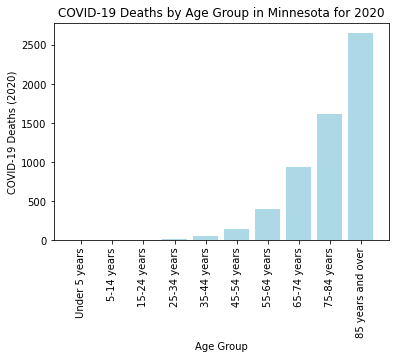

In [488]:
x_axis = []
x_axis = minnesota_df['Age Group'].tolist()

y_axis = minnesota_df.iloc[:,7].astype(float)

y_2021 = minnesota_2021.iloc[:,7].astype(float)

plt.bar(x_axis, y_axis, label='2020', color ='lightblue')

plt.title('COVID-19 Deaths by Age Group in Minnesota for 2020')
plt.ylabel('COVID-19 Deaths (2020)')
plt.xlabel('Age Group')

plt.xticks(rotation = 90)
plt.show()

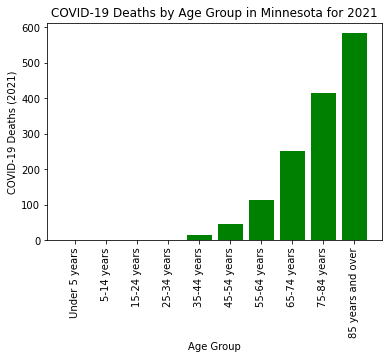

In [489]:
plt.bar(x_axis, y_2021, label='2021', color ='green')
plt.ylabel('COVID-19 Deaths (2021)')
plt.title('COVID-19 Deaths by Age Group in Minnesota for 2021')
plt.xlabel('Age Group')

plt.xticks(rotation = 90)
plt.show()

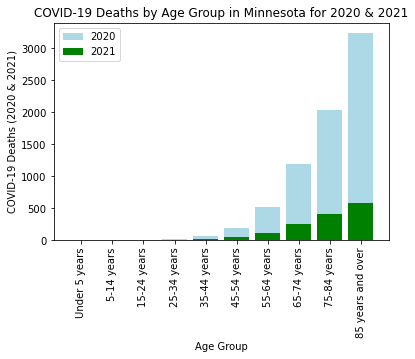

In [490]:
plt.bar(x_axis, y_axis, label='2020', color ='lightblue', bottom=y_2021)
plt.bar(x_axis, y_2021, label='2021', color ='green')


plt.title('COVID-19 Deaths by Age Group in Minnesota for 2020 & 2021')
plt.ylabel('COVID-19 Deaths (2020 & 2021)')
plt.xlabel('Age Group')

plt.xticks(rotation = 90)


plt.legend()
plt.show()

In [491]:
death_rate = pd.read_csv("Folder2/Final_DeathRate_byState_042021.csv")
death_rate


,Unnamed: 0,Covid_Death_Rate
0,NaN,4.000000
1,NaN,2021.000000
2,State,NaN
3,RMI,0.000000
4,FSM,0.000000
...,...,...
58,NJ,2.560801
59,MA,2.663615
60,NYC,3.507770
61,AS,NaN
